### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-11/12/19
#### Clasificacion de RWE-DWT de MI-EEG con LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego transpuesta

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [7]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [8]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [12]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 88us/sample - loss: 1.2924 - acc: 0.4201
kappa:  0.22685185185185186
confusion matrix:
 [[16 36 16  4]
 [ 2 29 33  8]
 [ 3 11 57  1]
 [ 8 11 34 19]]
(0.4714875821018062, 0.42013888888888884, 0.3961830054558431, None)


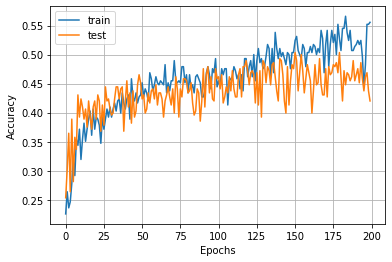

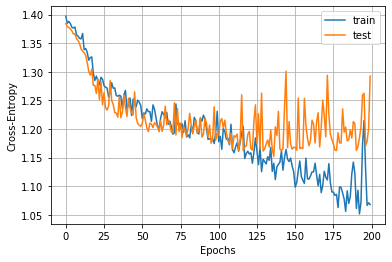

Iteration: 2
288/288 [==============================] - 0s 89us/sample - loss: 1.2018 - acc: 0.4792
kappa:  0.3055555555555556
confusion matrix:
 [[28 32  7  5]
 [ 8 39 15 10]
 [10 21 31 10]
 [11 15  6 40]]
(0.49913059892050615, 0.4791666666666667, 0.48177169141585613, None)


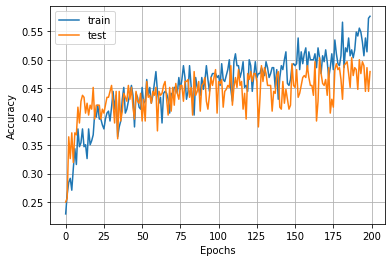

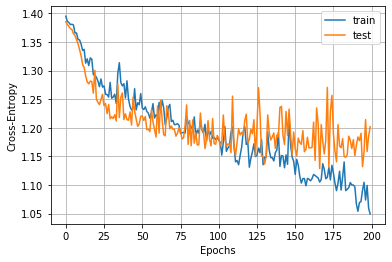

Iteration: 3
288/288 [==============================] - 0s 79us/sample - loss: 1.1523 - acc: 0.4965
kappa:  0.3287037037037037
confusion matrix:
 [[31 24  5 12]
 [ 7 23 19 23]
 [ 6  8 37 21]
 [ 6  7  7 52]]
(0.5041417176189472, 0.4965277777777778, 0.4894573774375585, None)


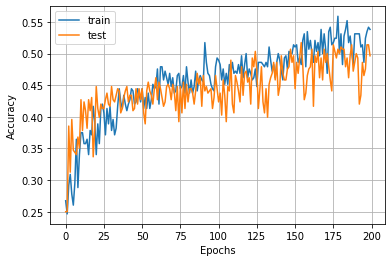

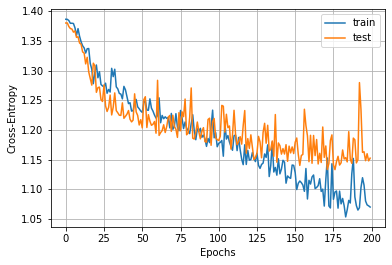

Iteration: 4
288/288 [==============================] - 0s 85us/sample - loss: 1.2156 - acc: 0.4861
kappa:  0.31481481481481477
confusion matrix:
 [[29 31  6  6]
 [ 7 40 14 11]
 [ 8 19 31 14]
 [12 13  7 40]]
(0.5010174244327701, 0.4861111111111111, 0.48665787337662336, None)


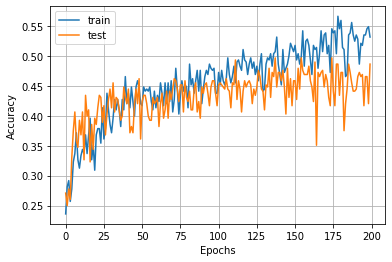

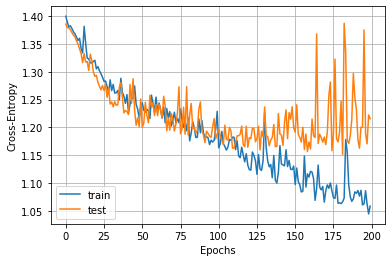

Iteration: 5
288/288 [==============================] - 0s 89us/sample - loss: 1.2190 - acc: 0.4583
kappa:  0.2777777777777778
confusion matrix:
 [[29  8 10 25]
 [ 8  7 23 34]
 [ 6  4 36 26]
 [ 4  1  7 60]]
(0.46362464764258404, 0.45833333333333337, 0.41976268730455685, None)


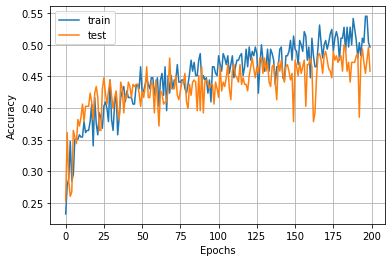

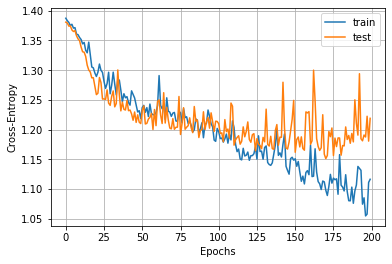

Iteration: 6
288/288 [==============================] - 0s 83us/sample - loss: 1.2445 - acc: 0.4688
kappa:  0.29166666666666663
confusion matrix:
 [[26  7  9 30]
 [ 3  9 22 38]
 [ 1  5 38 28]
 [ 1  2  7 62]]
(0.5306047721341453, 0.46875, 0.4367430003596719, None)


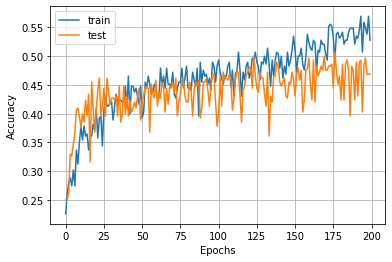

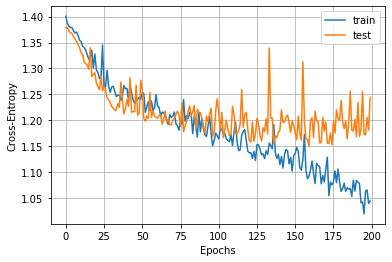

Iteration: 7
288/288 [==============================] - 0s 95us/sample - loss: 1.2204 - acc: 0.4826
kappa:  0.31018518518518523
confusion matrix:
 [[24 25 17  6]
 [ 3 29 26 14]
 [ 3 10 49 10]
 [ 7  9 19 37]]
(0.5098972925082106, 0.4826388888888889, 0.47706504971988717, None)


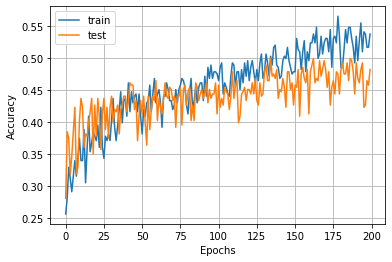

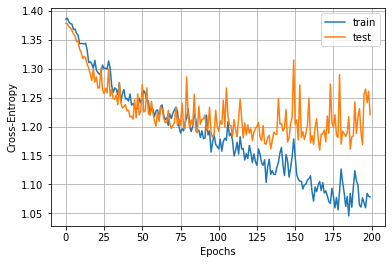

Iteration: 8
288/288 [==============================] - 0s 91us/sample - loss: 1.1846 - acc: 0.4792
kappa:  0.3055555555555556
confusion matrix:
 [[19 28 11 14]
 [ 2 28 20 22]
 [ 3 10 40 19]
 [ 2  8 11 51]]
(0.5195211406670219, 0.47916666666666674, 0.46595774330553025, None)


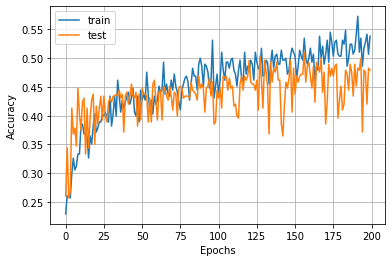

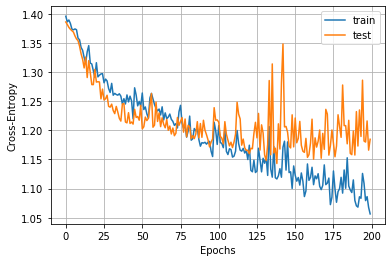

Iteration: 9
288/288 [==============================] - 0s 89us/sample - loss: 1.2143 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[42 22  3  5]
 [20 27 11 14]
 [15 11 30 16]
 [18 11  6 37]]
(0.4840689605469072, 0.4722222222222222, 0.4715771392939598, None)


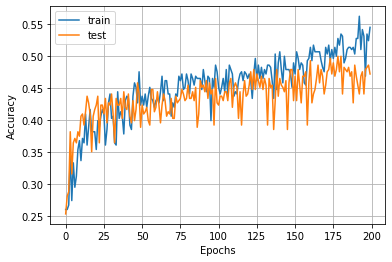

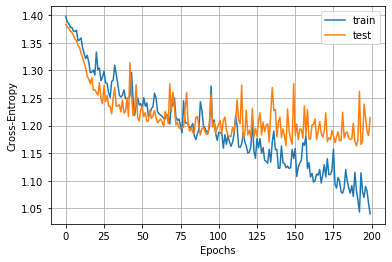

Iteration: 10
288/288 [==============================] - 0s 81us/sample - loss: 1.2100 - acc: 0.4583
kappa:  0.2777777777777778
confusion matrix:
 [[18 26 14 14]
 [ 2 23 33 14]
 [ 3  9 49 11]
 [ 3  8 19 42]]
(0.49634950395819954, 0.45833333333333337, 0.44344101276874387, None)


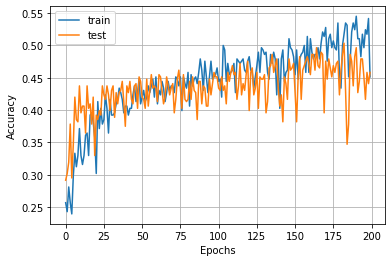

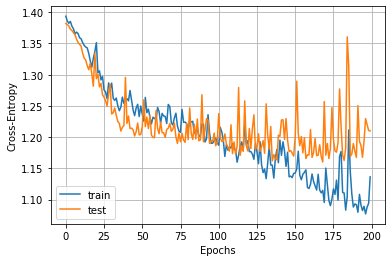


Resultados:
loss: [1.292437473932902, 1.2018243206871881, 1.1523384518093533, 1.2156203985214233, 1.2190447913275824, 1.2444528076383803, 1.220396916071574, 1.1846206188201904, 1.214279055595398, 1.2099567121929593]
accuracy: [0.4201389, 0.47916666, 0.4965278, 0.4861111, 0.45833334, 0.46875, 0.4826389, 0.47916666, 0.4722222, 0.45833334]
kappa: [0.22685185185185186, 0.3055555555555556, 0.3287037037037037, 0.31481481481481477, 0.2777777777777778, 0.29166666666666663, 0.31018518518518523, 0.3055555555555556, 0.2962962962962963, 0.2777777777777778]
precision: [0.4714875821018062, 0.49913059892050615, 0.5041417176189472, 0.5010174244327701, 0.46362464764258404, 0.5306047721341453, 0.5098972925082106, 0.5195211406670219, 0.4840689605469072, 0.49634950395819954]
recall: [0.42013888888888884, 0.4791666666666667, 0.4965277777777778, 0.4861111111111111, 0.45833333333333337, 0.46875, 0.4826388888888889, 0.47916666666666674, 0.4722222222222222, 0.45833333333333337]
f1: [0.3961830054558431, 0.4817

In [13]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(128, input_shape=(3,22)))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    #200 epocas
    history = model.fit(x_train, y_train, epochs=200, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [14]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128)               77312     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 77,828
Trainable params: 77,828
Non-trainable params: 0
_________________________________________________________________


In [15]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4701
std: (+/- 0.0201)
kappa: 0.2935
std: 0.0269
precision: 0.4980
recall: 0.4701
f1: 0.4569
